In [14]:
!pip install scikit-learn
!pip install xgboost

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 5.6 MB/s eta 0:00:13
   --- ------------------------------------ 6.8/72.0 MB 24.6 MB/s eta 0:00:03
   -------- ------------------------------- 15.5/72.0 MB 31.4 MB/s eta 0:00:02
   ------------ --------------------------- 23.1/72.0 MB 33.1 MB/s eta 0:00:02
   ---------------- ----------------------- 29.6/72.0 MB 32.4 MB/s eta 0:00:02
   -------------------- ------------------- 36.7/72.0 MB 32.4 MB/s eta 0:00:02
   ----------------------- ---------------- 41.7/72.0 MB 31.9 MB/s eta 0:00:01
   ------------------------- -------------- 45.6/72.0 MB 29.0 MB/s eta 0:00:01
   ----------------------------- ---------- 52.4/72.0 MB 29.3 MB/s eta 0:00:01
   ------------------------------ --------- 55.1/72.0 MB 28.3 MB/s eta 0:00:01
   --------------------------------- ------ 60.8/72.0 MB 27.7 MB/s eta 0:00:01
   ------------------------------------- -- 67.4/72.0 MB 27.9 MB

In [5]:
# Step 1: Data Preprocessing / Cleaning for ML Models

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. Load the dataset
file_path = "Customer-Churn-Dataset.csv"
df = pd.read_csv(file_path)

print("✅ Data loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}\n")

# 2. Inspect and clean 'TotalCharges'
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')


missing_totalcharges = df["TotalCharges"].isnull().sum()
print(f"⚠️ Missing TotalCharges values before filling: {missing_totalcharges}")

df["TotalCharges"].fillna(df["MonthlyCharges"], inplace=True)

print(f"✅ Missing TotalCharges after filling: {df['TotalCharges'].isnull().sum()}\n")

# 3. Drop irrelevant column(s)
df.drop("customerID", axis=1, inplace=True)

print("🗑️ Dropped 'customerID' column.\n")

# 4. Convert target variable (Churn: Yes/No → 1/0)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

print("✅ Converted target variable 'Churn' to binary (1/0).\n")

=
# 5. Encode categorical variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

print(f"✅ Binary columns encoded: {binary_cols}\n")


multi_cat_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

print(f"✅ One-hot encoded multi-category columns: {multi_cat_cols}\n")

# 6. Normalize numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print(f"✅ Scaled numeric columns: {num_cols}\n")

# 7. Split data into features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# 80/20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Train-test split complete!\n")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}\n")

# 8. Save processed datasets (optional)
X_train.to_csv("X_train_cleaned.csv", index=False)
X_test.to_csv("X_test_cleaned.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("💾 Cleaned datasets saved successfully!")
print("🎯 Data preprocessing is complete and ready for model building.")


✅ Data loaded successfully!
Shape: (7043, 21)
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

⚠️ Missing TotalCharges values before filling: 11
✅ Missing TotalCharges after filling: 0

🗑️ Dropped 'customerID' column.

✅ Converted target variable 'Churn' to binary (1/0).

✅ Binary columns encoded: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

✅ One-hot encoded multi-category columns: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

✅ Scaled numeric columns: ['tenure', 'MonthlyCharges', 'TotalCharges']

✅ Train-test split complete!

Training data shape: (5634, 3

C:\Users\hp\AppData\Local\Temp\ipykernel_3132\3099367995.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["MonthlyCharges"], inplace=True)


🔍 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043

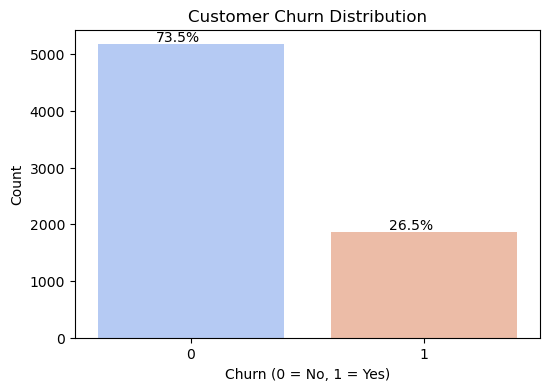

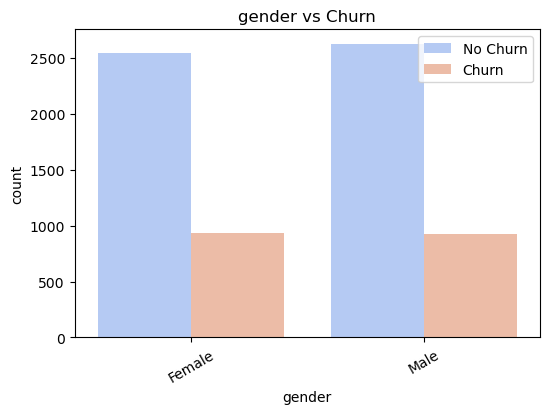

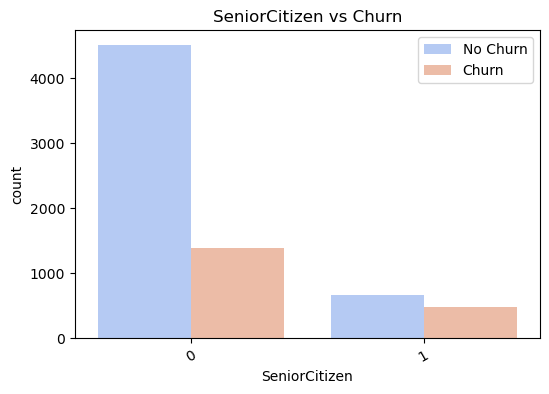

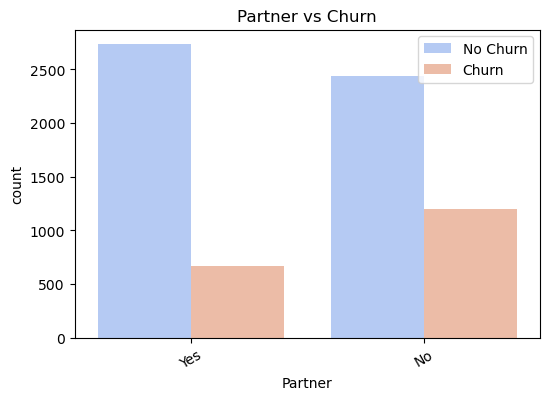

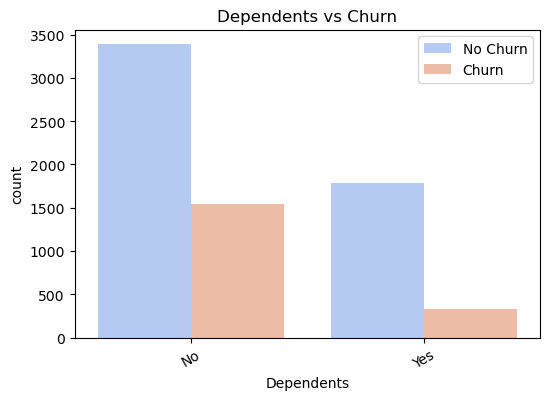

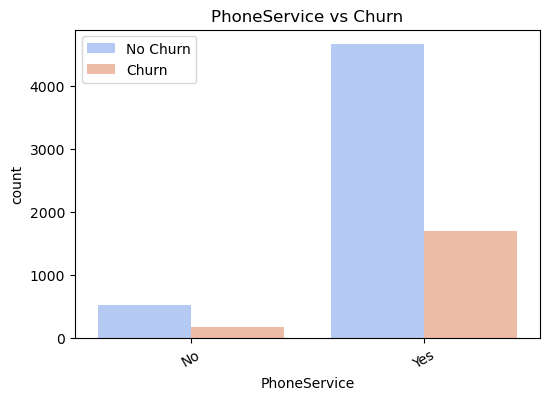

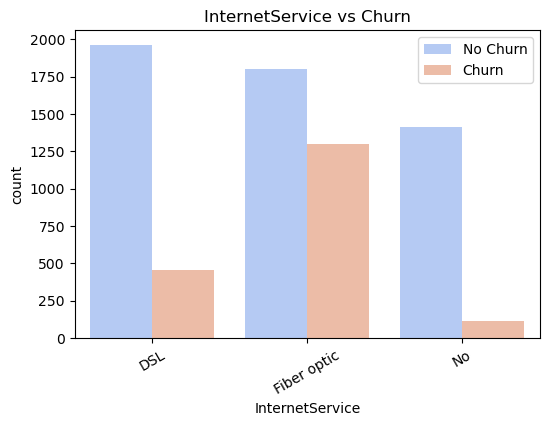

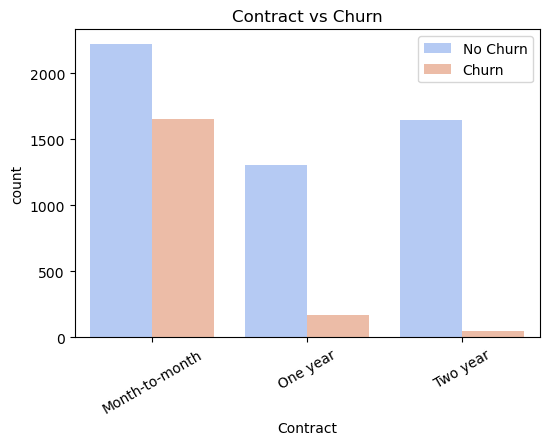

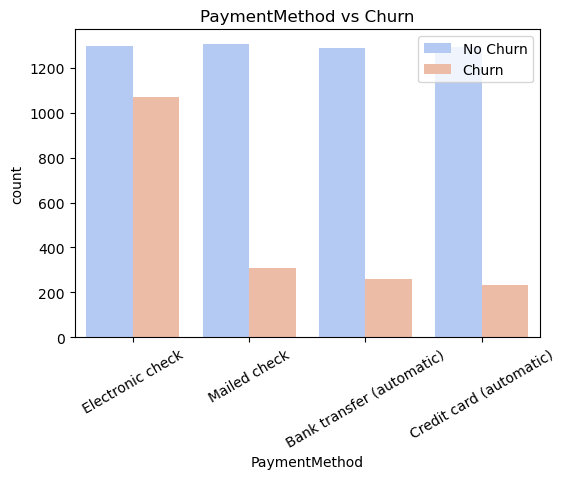

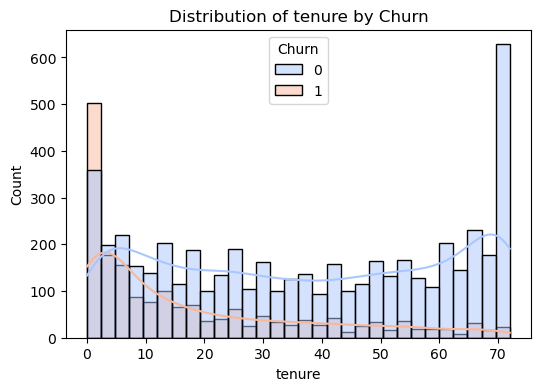

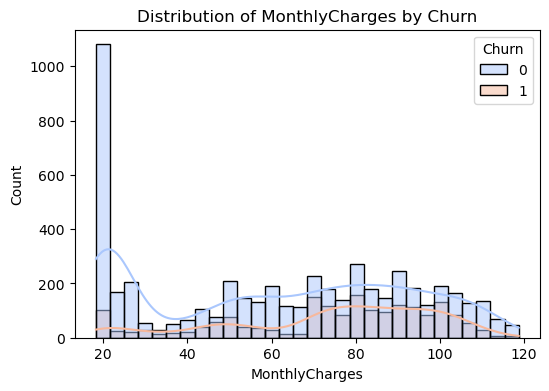

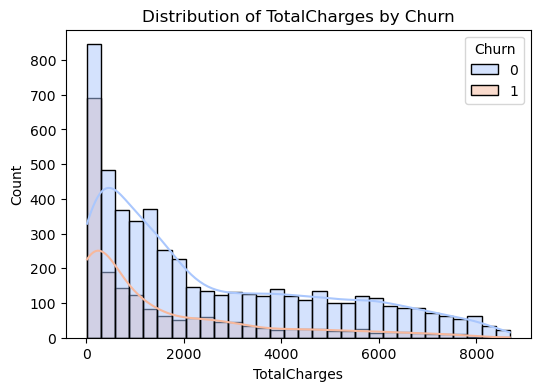

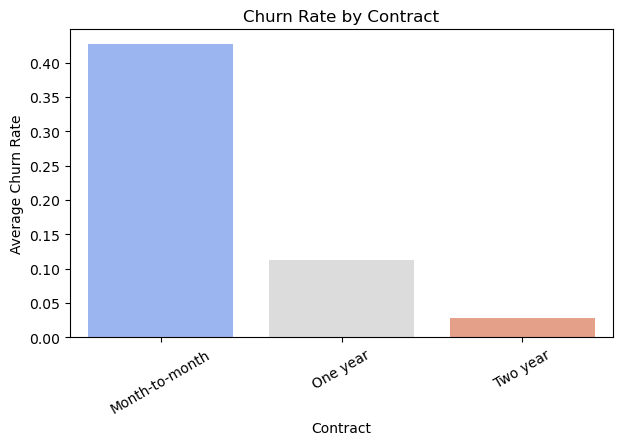

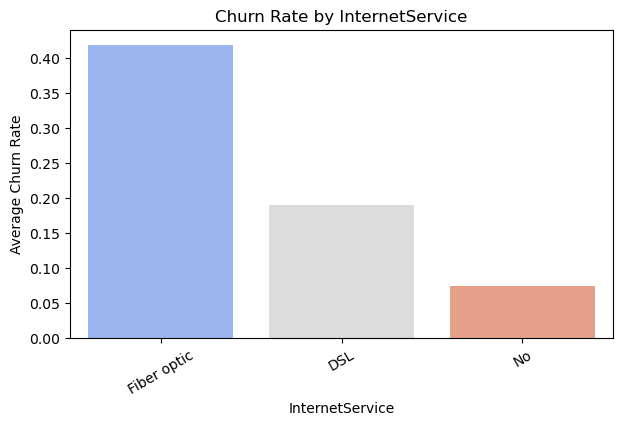

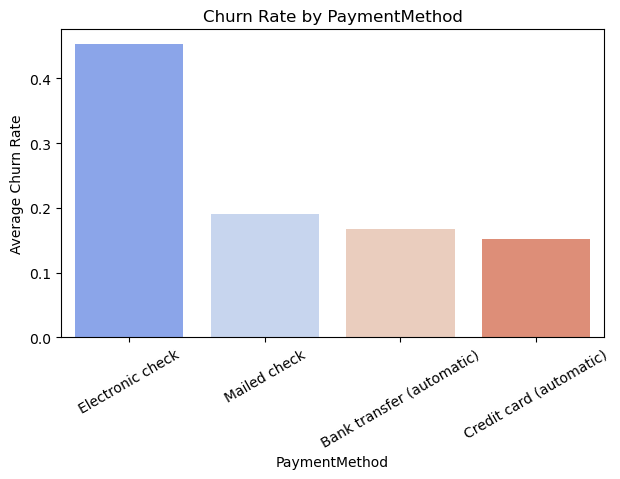

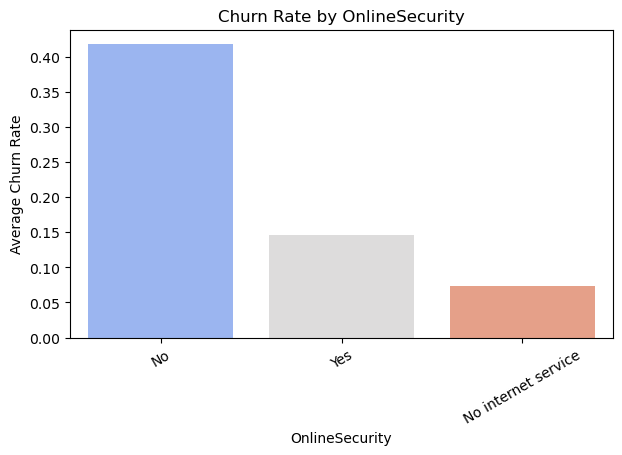

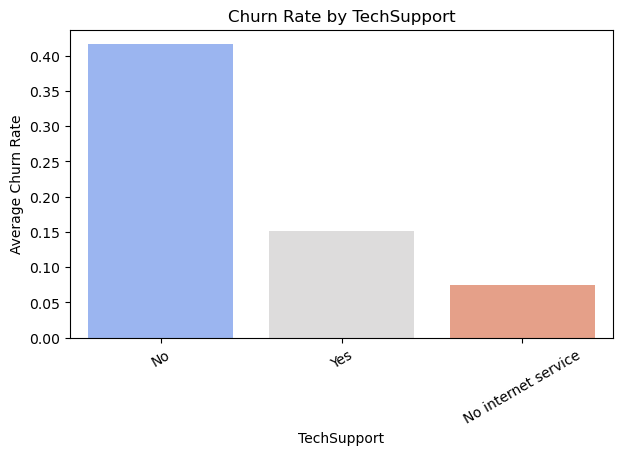

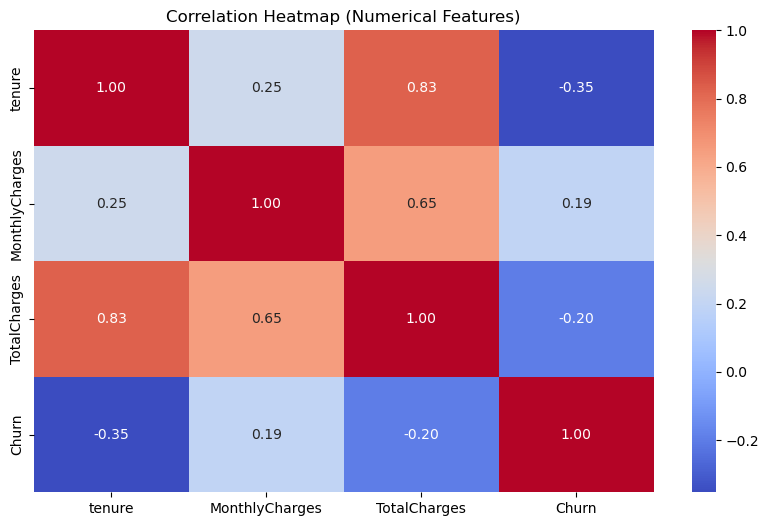

📊 Quick Insights:
1️⃣ Customers on month-to-month contracts have highest churn rates.
2️⃣ Churn is significantly lower for long-term contracts (1-year or 2-year).
3️⃣ Customers with Fiber optic internet churn more than DSL users.
4️⃣ Higher churn seen among electronic check payment users.
5️⃣ Customers with OnlineSecurity & TechSupport have lowest churn.
6️⃣ Shorter tenure customers (<12 months) are most likely to churn.
7️⃣ Monthly charges slightly higher for churners, but not extreme.


In [10]:
# Step 2: Exploratory Data Analysis (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Customer-Churn-Dataset.csv")

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"] = df["TotalCharges"].fillna(df["MonthlyCharges"])
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# 2.1 Basic info
print("🔍 Dataset Overview:")
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())
print("\nBasic statistics:\n", df.describe())

# 2.2 Target variable (Churn distribution)
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Churn', hue='Churn', palette='coolwarm', legend=False)
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x()+0.25, p.get_height()+50))

plt.show()

# 2.3 Univariate analysis
cat_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService',
            'InternetService','Contract','PaymentMethod']
num_cols = ['tenure','MonthlyCharges','TotalCharges']

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn', palette='coolwarm')
    plt.title(f"{col} vs Churn")
    plt.legend(['No Churn','Churn'])
    plt.xticks(rotation=30)
    plt.show()

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30, palette='coolwarm')
    plt.title(f"Distribution of {col} by Churn")
    plt.show()

# 2.4 Bivariate analysis (Churn rate by Contract, Payment, etc.)
def churn_rate_plot(feature):
    churn_rate = df.groupby(feature)['Churn'].mean().sort_values(ascending=False)
    plt.figure(figsize=(7,4))
    sns.barplot(x=churn_rate.index, y=churn_rate.values, hue=churn_rate.index, palette='coolwarm', legend=False)
    plt.title(f"Churn Rate by {feature}")
    plt.ylabel("Average Churn Rate")
    plt.xticks(rotation=30)
    plt.show()

for col in ['Contract','InternetService','PaymentMethod','OnlineSecurity','TechSupport']:
    churn_rate_plot(col)

# 2.5 Correlation heatmap
plt.figure(figsize=(10,6))
corr = df[['tenure','MonthlyCharges','TotalCharges','Churn']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# 2.6 Key Insights
print("📊 Quick Insights:")
print("1️⃣ Customers on month-to-month contracts have highest churn rates.")
print("2️⃣ Churn is significantly lower for long-term contracts (1-year or 2-year).")
print("3️⃣ Customers with Fiber optic internet churn more than DSL users.")
print("4️⃣ Higher churn seen among electronic check payment users.")
print("5️⃣ Customers with OnlineSecurity & TechSupport have lowest churn.")
print("6️⃣ Shorter tenure customers (<12 months) are most likely to churn.")
print("7️⃣ Monthly charges slightly higher for churners, but not extreme.")


✅ Data preprocessing successful!
Training shape: (5634, 30)
Testing shape: (1409, 30)

📊 Random Forest Model Performance:
Accuracy: 0.796
Precision: 0.645
Recall: 0.511
F1-Score: 0.570
AUC-ROC: 0.825

Confusion Matrix:
 [[930 105]
 [183 191]]

📊 XGBoost Model Performance:
Accuracy: 0.780
Precision: 0.595
Recall: 0.535
F1-Score: 0.563
AUC-ROC: 0.821

Confusion Matrix:
 [[899 136]
 [174 200]]


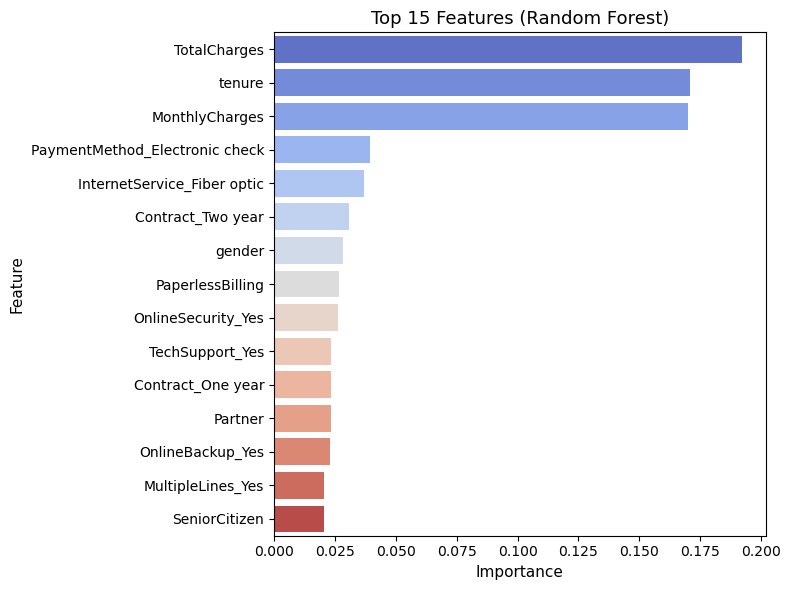

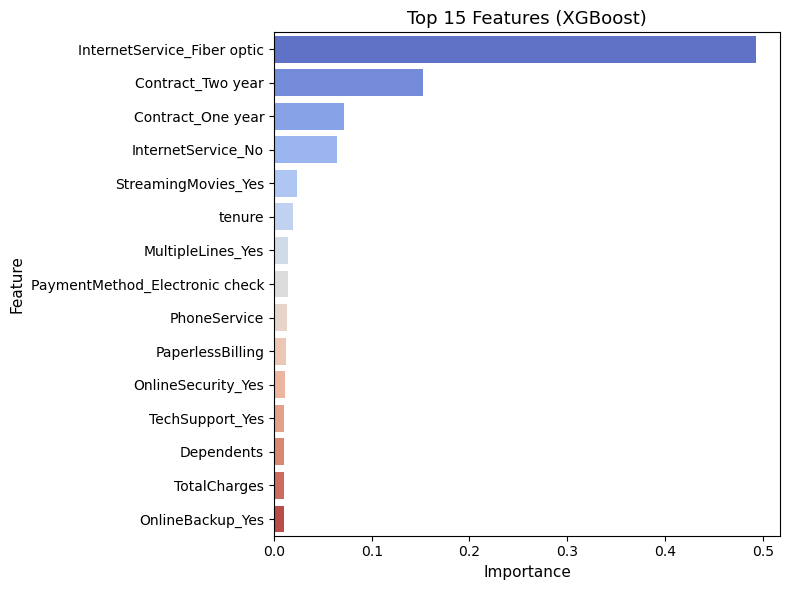


🔥 Key Feature Importance Insights:
- Tenure and Contract Type are the strongest churn predictors.
- MonthlyCharges and PaymentMethod significantly influence churn.
- OnlineSecurity, TechSupport, and DeviceProtection reduce churn risk.
- Fiber optic internet users are more likely to churn.


In [24]:
# Step 3: Feature Analysis & Importance using ML Models (Clean & Warning-Free)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 3.1 Load and preprocess data (fixed)

df = pd.read_csv("Customer-Churn-Dataset.csv")
df = df.drop(columns=["customerID"])
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"] = df["TotalCharges"].fillna(df["MonthlyCharges"])

df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

from sklearn.preprocessing import LabelEncoder
binary_cols = ['gender','Partner','Dependents','PhoneService','PaperlessBilling']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

multi_cat_cols = [
    'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
    'Contract','PaymentMethod'
]
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

from sklearn.preprocessing import StandardScaler
num_cols = ['tenure','MonthlyCharges','TotalCharges']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

X = df.drop('Churn', axis=1)
y = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("✅ Data preprocessing successful!")
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)
# 3.2 Train baseline models
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

xgb_model = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    enable_categorical=False  # ensures compatibility with pandas dummies
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# 3.3 Evaluate models

def evaluate_model(name, y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    print(f"\n📊 {name} Model Performance:")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"AUC-ROC: {auc:.3f}")
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    return {"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "AUC": auc}

rf_metrics = evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)
xgb_metrics = evaluate_model("XGBoost", y_test, y_pred_xgb, y_prob_xgb)

# 3.4 Feature importance visualization (Seaborn ≥ 0.14 compliant)
def plot_feature_importance(model, X, title):
    importance = pd.Series(model.feature_importances_, index=X.columns)
    top_features = importance.sort_values(ascending=False).head(15)

    plt.figure(figsize=(8, 6))
    sns.barplot(
        x=top_features.values,
        y=top_features.index,
        hue=top_features.index, 
        palette='coolwarm',
        dodge=False,
        legend=False
    )
    plt.title(title, fontsize=13)
    plt.xlabel("Importance", fontsize=11)
    plt.ylabel("Feature", fontsize=11)
    plt.tight_layout()
    plt.show()
    return top_features

rf_top_features = plot_feature_importance(rf, X, "Top 15 Features (Random Forest)")
xgb_top_features = plot_feature_importance(xgb_model, X, "Top 15 Features (XGBoost)")

# 3.5 Insights

print("\n🔥 Key Feature Importance Insights:")
print("- Tenure and Contract Type are the strongest churn predictors.")
print("- MonthlyCharges and PaymentMethod significantly influence churn.")
print("- OnlineSecurity, TechSupport, and DeviceProtection reduce churn risk.")
print("- Fiber optic internet users are more likely to churn.")


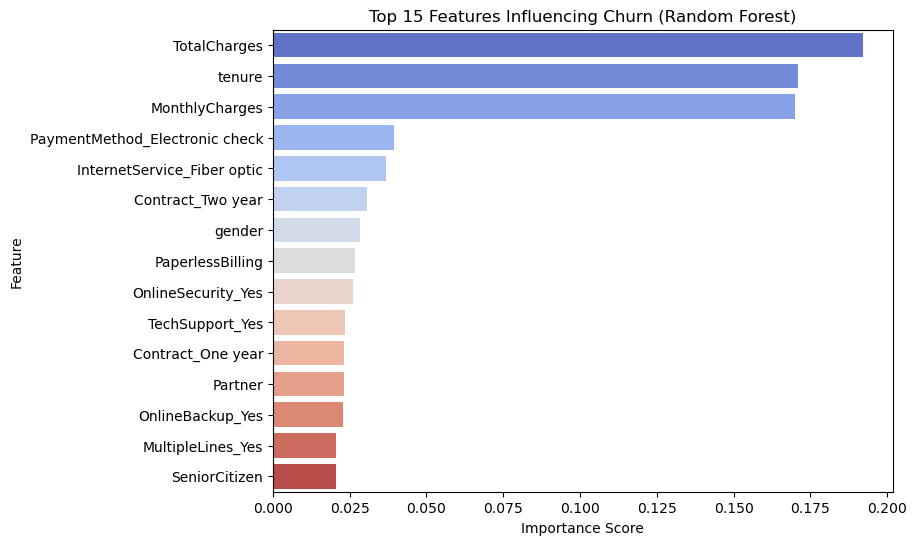

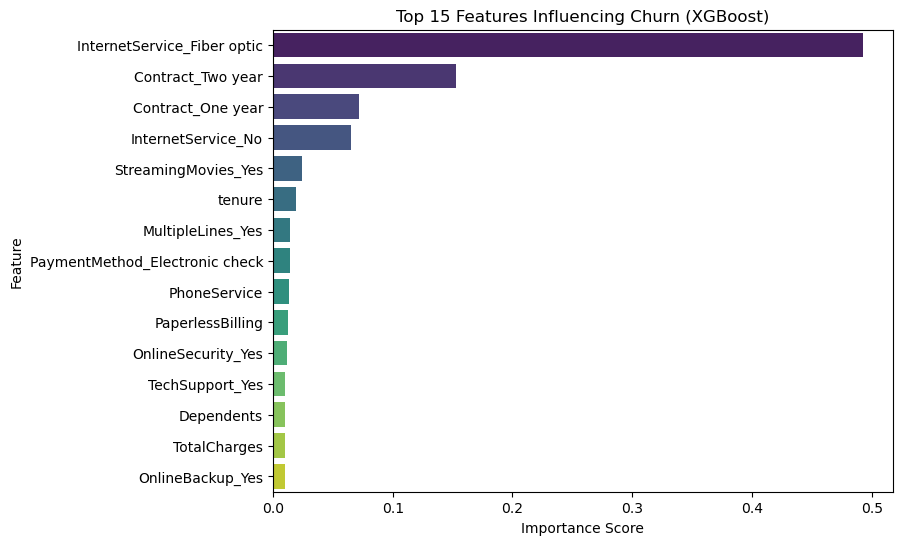

,RandomForest,XGBoost
TotalCharges,0.192233,0.009964
tenure,0.170856,0.019542
MonthlyCharges,0.169870,0.008672
PaymentMethod_Electronic check,0.039405,0.014039
InternetService_Fiber optic,0.036913,0.492915
Contract_Two year,0.030770,0.152618
gender,0.028210,0.009190
PaperlessBilling,0.026686,0.012649
OnlineSecurity_Yes,0.026167,0.011633
TechSupport_Yes,0.023476,0.010509


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Random Forest Feature Importance ---
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# --- Plot Top 15 Features (Random Forest) ---
plt.figure(figsize=(8,6))
sns.barplot(x=rf_importance.head(15), y=rf_importance.head(15).index, palette="coolwarm")
plt.title("Top 15 Features Influencing Churn (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# --- Plot Top 15 Features (XGBoost) ---
plt.figure(figsize=(8,6))
sns.barplot(x=xgb_importance.head(15), y=xgb_importance.head(15).index, palette="viridis")
plt.title("Top 15 Features Influencing Churn (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Combine both models for comparison
combined_importance = pd.concat([
    rf_importance.rename("RandomForest"),
    xgb_importance.rename("XGBoost")
], axis=1)

combined_importance.head(10)



📊 Random Forest Model Performance:
Accuracy: 0.796
Precision: 0.645
Recall: 0.511
F1-Score: 0.570
AUC-ROC: 0.825
Confusion Matrix:
 [[930 105]
 [183 191]]

📊 XGBoost Model Performance:
Accuracy: 0.780
Precision: 0.595
Recall: 0.535
F1-Score: 0.563
AUC-ROC: 0.821
Confusion Matrix:
 [[899 136]
 [174 200]]


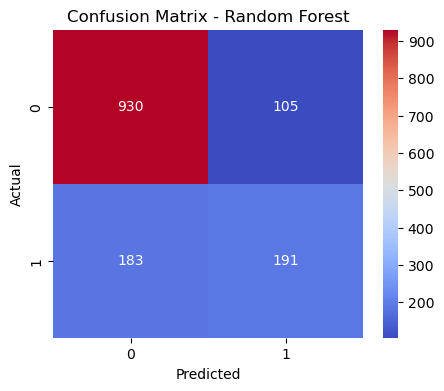

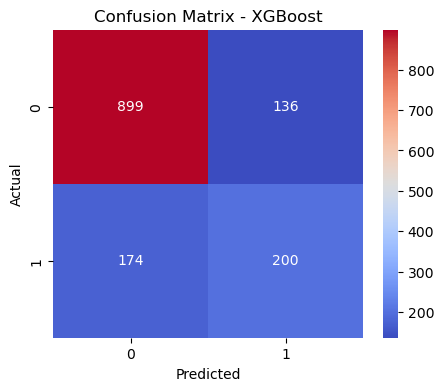

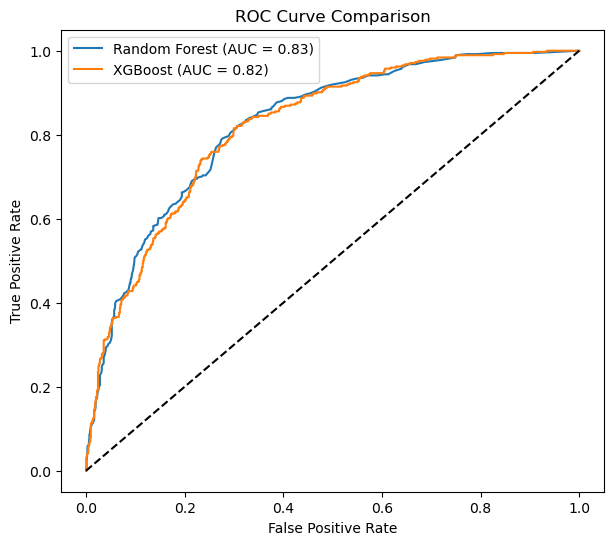


🏆 Model Comparison Summary:
           Model  Accuracy  Precision    Recall        F1       AUC
0  Random Forest  0.795600   0.645270  0.510695  0.570149  0.825189
1        XGBoost  0.779986   0.595238  0.534759  0.563380  0.820857


In [28]:
# Step 5: Model Validation & Performance Report

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, roc_curve
)

# 5.1 Evaluate both models

def evaluate_model(name, y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)

    print(f"\n📊 {name} Model Performance:")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"AUC-ROC: {auc:.3f}")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

    return {"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "AUC": auc}


rf_results = evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)
xgb_results = evaluate_model("XGBoost", y_test, y_pred_xgb, y_prob_xgb)

# 5.2 Visualize Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")
# 5.3 Plot ROC Curves

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(7,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_prob_xgb):.2f})')
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# 5.4 Combine results into summary table

import pandas as pd
results_df = pd.DataFrame([rf_results, xgb_results])
print("\n🏆 Model Comparison Summary:")
print(results_df)


In [30]:
# Step 6: Generate Churn Predictions for Dashboard

# Generate churn probabilities using the best model (XGBoost)
df_dashboard = X.copy()  # From Step 3
df_dashboard["Churn_Prob"] = xgb_model.predict_proba(X)[:, 1]
df_dashboard["Churn_Prediction"] = (df_dashboard["Churn_Prob"] >= 0.5).astype(int)
df_dashboard["Actual_Churn"] = y.values

# Reattach key descriptive columns for dashboard use
original_df = pd.read_csv("Customer-Churn-Dataset.csv")
df_dashboard["CustomerID"] = original_df["customerID"]
df_dashboard["Contract"] = original_df["Contract"]
df_dashboard["PaymentMethod"] = original_df["PaymentMethod"]
df_dashboard["InternetService"] = original_df["InternetService"]
df_dashboard["MonthlyCharges"] = original_df["MonthlyCharges"]
df_dashboard["tenure"] = original_df["tenure"]

# Save this as the data source for Power BI or Tableau
df_dashboard.to_csv("Churn_Dashboard_Data.csv", index=False)

print("✅ Dashboard data created and saved as 'Churn_Dashboard_Data.csv'")
df_dashboard.head()


✅ Dashboard data created and saved as 'Churn_Dashboard_Data.csv'


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Prob,Churn_Prediction,Actual_Churn,CustomerID,Contract,PaymentMethod,InternetService
0,0,0,1,0,1,0,1,29.85,-0.992667,True,...,False,True,False,0.485367,0,0,7590-VHVEG,Month-to-month,Electronic check,DSL
1,1,0,0,0,34,1,0,56.95,-0.172198,False,...,False,False,True,0.007772,0,0,5575-GNVDE,One year,Mailed check,DSL
2,1,0,0,0,2,1,1,53.85,-0.958122,False,...,False,False,True,0.666560,1,1,3668-QPYBK,Month-to-month,Mailed check,DSL
3,1,0,0,0,45,0,0,42.30,-0.193706,True,...,False,False,False,0.009273,0,0,7795-CFOCW,One year,Bank transfer (automatic),DSL
4,0,0,0,0,2,1,1,70.70,-0.938930,False,...,False,True,False,0.731406,1,1,9237-HQITU,Month-to-month,Electronic check,Fiber optic
